# Questions to ask



## 1- BUSINESS UNDERSTANDING
The dataset used in this Data Science project is about Airbnb listing in Seattle city. The dataset contains information about listings in Seatlle for the full year of 2016, in addtion calendar dataset realted to the corresponding prices for each listing will also be investigate.

The aim of my analysis is to answer the below questions from an investor prespective:


- 1- What time of the year should you put you home on Airbnb for maximum return
- 2- what are the most in demand amenties of the listings
- 3- what area should be your future investment to obtain high rental yield
- 4- Prediction: What drives high rental return, ie what you need to do to obtain maximum return, ie factors that has the most correlation with price.


## 2- DATA UNDERSTANDING

I will start by importing the needed library, ready the csv files and peak into these dataset

In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import Counter
%matplotlib inline

# Reading the listing and calendar files
df_listing = pd.read_csv('listings.csv')
df_calendar = pd.read_csv('calendar.csv')

# Listings Dataset

In [2]:
# Review columns and top 5 rows of Listing file
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [4]:
# Review missing value
df_listing.isnull().sum().sort_values(ascending=False)

license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
reviews_per_month                    627
first_review                         627
last_review                          627
space                                569
host_response_time                   523
host_response_rate                   523
neighbourhood   

In [5]:
# Review size of the data set
df_listing.shape

(3818, 92)

In [6]:
# Review statistcal information
df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


### Findings - Listing dataset

- 1) The dataset contains about 4000 observations with 92 features
- 2) Columns such as review_score_rating, hoast acceptance rate , host_acceptance_rate all require review and Data wrangling
- 3) Columns such as License Fee and square feet to be dropped due to the number of missing values
- 4) Categorical columns such as property type, cancelaion policy,host_response_time to be converted to dummy variables 

# Calendar Dataset

In [7]:
# Review columns and top 5 rows of Listing file
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [9]:
df_calendar.shape

(1393570, 4)

In [10]:
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

### Findings - Calendar dataset

- 1) The dataset contains about 1.4 million observations with 4 features, where the daily rate is shown.
- 2) price column need to be converted to float and missing value to be addressed
- 3) Categorical column available to be converted to dummy variables if to be used in the predection model.

In [11]:
# # Couple Categorical data plots 

## 3- DATA PREPARATION

In [12]:
# create copy of dataframe for Data preparation

df_lis_copy =df_listing.copy()
df_cal_copy = df_calendar.copy()

## Question 1

- What is the best time of the year should you put your home on Airbnb for maximum return
    
    - To answer this question, first I need to prepare the calendar dataset , by extracting month and year from the dare column

In [13]:
df_calendar['year']= pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month']= pd.DatetimeIndex(df_calendar['date']).month
df_calendar['day'] = pd.DatetimeIndex(df_calendar['date']).day

df_calendar['price'] = df_calendar['price'].replace('[\$,]','', regex=True).astype(float)

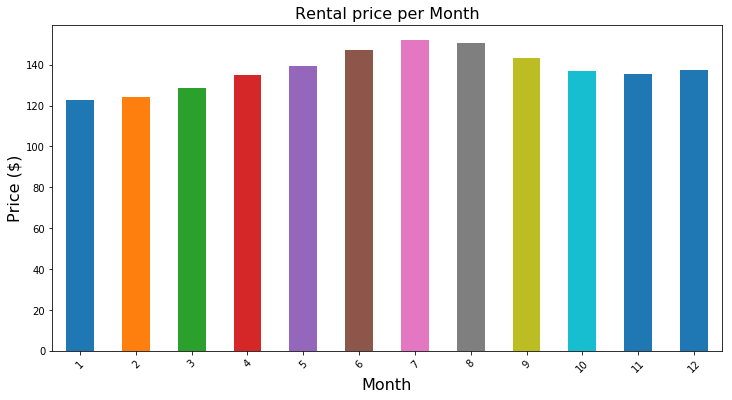

In [107]:
plt.figure(figsize=[12, 6])
df_calendar.groupby('month')['price'].mean().plot(kind='bar')
plt.title('Rental price per Month', fontsize = 16)
plt.xlabel('Month' , fontsize = 16)
plt.ylabel('Price ($)', fontsize = 16)
plt.xticks(rotation=45)
plt.show();

# Question 2
   - what are the most in demand amenties of the listings
       _ To answer this question, I need to transform "amenities" column into categorical values speratly including each amenity mentioned.
       
 

In [15]:
# create an new dataframe that include each amenties seperated by ","

df_amenities =df_listing['amenities'].str.split(',',expand=True)
df_amenities.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,Heating,"""Family/Kid Friendly""",Washer,Dryer},...,None,None,None,None,None,None,None,None,None,None
1,{TV,Internet,"""Wireless Internet""",Kitchen,"""Free Parking on Premises""","""Buzzer/Wireless Intercom""",Heating,"""Family/Kid Friendly""",Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
2,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,"""Free Parking on Premises""","""Pets Allowed""","""Pets live on this property""",Dog(s),...,Shampoo},None,None,None,None,None,None,None,None,None
3,{Internet,"""Wireless Internet""",Kitchen,"""Indoor Fireplace""",Heating,"""Family/Kid Friendly""",Washer,Dryer,"""Smoke Detector""","""Carbon Monoxide Detector""",...,None,None,None,None,None,None,None,None,None,None
4,{TV,"""Cable TV""",Internet,"""Wireless Internet""",Kitchen,Heating,"""Family/Kid Friendly""","""Smoke Detector""","""Carbon Monoxide Detector""","""First Aid Kit""",...,None,None,None,None,None,None,None,None,None,None


In [16]:
# Match only the character class [A-Za-z]
df_amenities = df_amenities.replace('[^\w\s]','', regex=True)
df_amenities.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,FamilyKid Friendly,Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
1,TV,Internet,Wireless Internet,Kitchen,Free Parking on Premises,BuzzerWireless Intercom,Heating,FamilyKid Friendly,Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
2,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Free Parking on Premises,Pets Allowed,Pets live on this property,Dogs,...,Shampoo,None,None,None,None,None,None,None,None,None
3,Internet,Wireless Internet,Kitchen,Indoor Fireplace,Heating,FamilyKid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,...,None,None,None,None,None,None,None,None,None,None
4,TV,Cable TV,Internet,Wireless Internet,Kitchen,Heating,FamilyKid Friendly,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,...,None,None,None,None,None,None,None,None,None,None


In [17]:
# Handle amenities - Explore most common amenities
amenities = []
for index, row in df_listing.iterrows():
    row['amenities'] = row['amenities'].replace('{','')
    row['amenities'] = row['amenities'].replace('}','')
    row['amenities'] = row['amenities'].replace('"','')
    mylist = row['amenities'].split(',')
    for l in mylist:
        amenities.append(l)
    
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3667),
 ('Heating', 3627),
 ('Kitchen', 3423),
 ('Smoke Detector', 3281),
 ('Essentials', 3237),
 ('Dryer', 2997),
 ('Washer', 2992),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2167),
 ('Family/Kid Friendly', 1963),
 ('First Aid Kit', 1680),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 886),
 ('Pets live on this property', 883),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 509),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 51),
 ('

In [18]:
amenities_new_cols =['a_wireless_internet|Wireless Internet','a_heating|Heating','a_kitchen|Kitchen','a_smoke_detector|Smoke Detector','a_essentials|Essentials','a_dryer|Dryer','amenities_washer|Washer','a_internet|Internet','a_shampoo|Shampoo','a_tv|TV','a_carbon_monoxide_detector|Carbon Monoxide Detector','a_fire_extinguisher|Fire Extinguisher','a_free_parking|Free Parking on Premises']
for c in amenities_new_cols:
    c_colname,c_desc = c.split('|')
    df_listing[c_colname] = df_listing['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [19]:
df_listing['price'] = df_listing['price'].replace('[\$,]','', regex=True).astype(float)

In [20]:
to_be_combined = []

for c in amenities_new_cols:
    c_colname,c_desc = c.split('|')
    to_be_combined.append(df_listing.groupby(c_colname)['price'].mean().rename(c_colname))

    
    
df_combined = pd.DataFrame(to_be_combined)

df_combined.info()

#df_combined.sort_values(by=0, inplace=True, ascending=False)
df_combined.head(25)

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, a_wireless_internet to a_free_parking
Data columns (total 2 columns):
0    13 non-null float64
1    13 non-null float64
dtypes: float64(2)
memory usage: 312.0+ bytes


a_free_parking,0,1
a_wireless_internet,115.781457,128.478320
a_heating,121.256545,128.330025
a_kitchen,94.764557,131.808647
a_smoke_detector,122.648045,128.848217
a_essentials,132.161790,127.224900
a_dryer,107.420455,132.623314
amenities_washer,107.199758,133.711898
a_internet,116.317460,128.374052
a_shampoo,123.543554,129.882022
a_tv,95.947075,140.561109


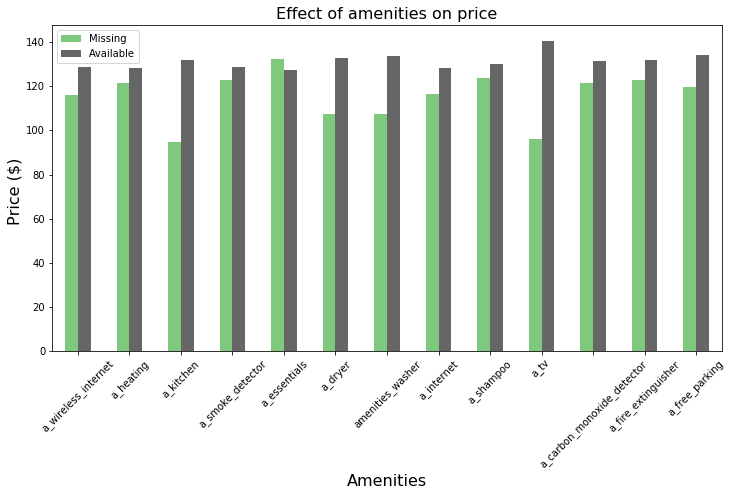

In [109]:
fig, ax = plt.subplots()
df_combined.plot(kind='bar', figsize=(12,6), ax=ax, colormap='Accent')

ax.legend(["Missing", "Available"]);

plt.title('Effect of amenities on price' ,fontsize = 16)
plt.xlabel('Amenities', fontsize = 16)
plt.ylabel('Price ($) ', fontsize = 16)

plt.xticks(rotation=45)
plt.show();

#leg = ax.get_legend()
#leg.legendHandles[0].set_color('red')
#leg.legendHandles[1].set_color('yellow');

# Question 3
-  what area should be your future investment to obtain high rental yield

In [22]:
df_listing['price'] = df_listing['price'].replace('[\$,]','', regex=True).astype(float)

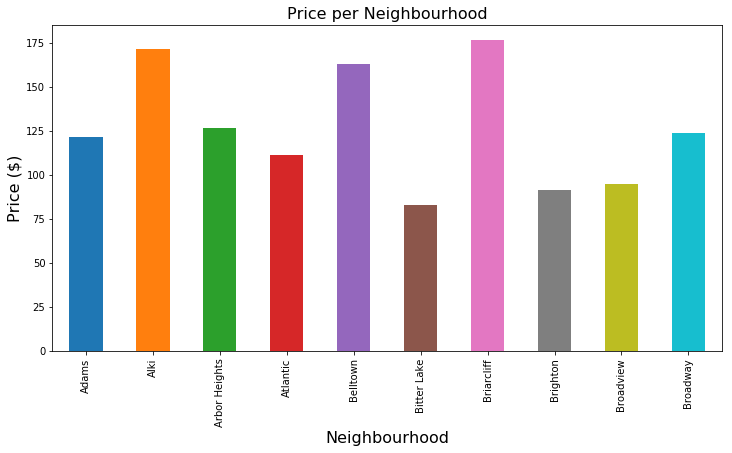

In [110]:
plt.figure(figsize = [12, 6])
df_listing.groupby('neighbourhood_cleansed')['price'].mean().head(10).plot(kind='bar');

plt.title('Price per Neighbourhood' ,fontsize = 16)
plt.xlabel('Neighbourhood', fontsize = 16)
plt.ylabel('Price ($)', fontsize = 16);


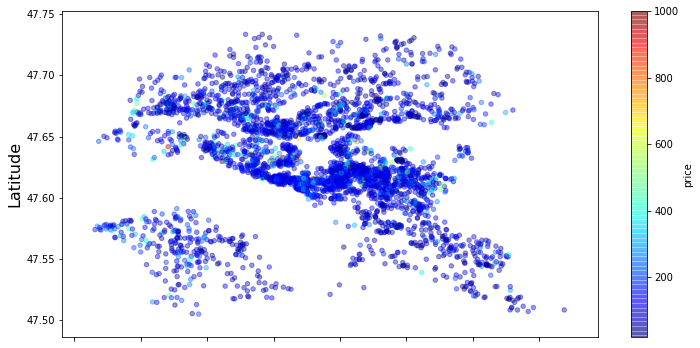

In [111]:
df_listing.plot(kind='scatter', 
                x='longitude',y='latitude', c='price',cmap=plt.get_cmap("jet"), 
                colorbar=True, alpha=0.4, figsize=(12,6))

plt.xlabel('longitude', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16);





Question 4
- 4- Prediction: What drives high rental return, ie what you need to do to obtain maximum return. **Price prediction can help understand what factors mostly correlate with price. This is helpful so these features can be top of mind for AirBnB as well as AirBnB hosts.**

In [25]:
df_pred = df_listing.copy()

In [26]:
df_listing['price'].isnull().sum()

0

In [27]:
df_pred.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'a_smoke_detector', 'a_essentials', 'a_dryer', 'amenities_washer',
       'a_internet', 'a_shampoo', 'a_tv', 'a_carbon_monoxide_detector',
       'a_fire_extinguisher', 'a_free_parking'],
      dtype='object', length=105)

I will start dropping columns while keeping the most appropriate for the price predition analysis. The columns to be dropped are the following:

amenities (which has been addressed previously), 
id,listing_url,
scrape_id,'
last_scraped',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_id',
 'license',
 'square_feet'
 'property_type'
 'experiences_offered'
 'extra_people'
 'host_url',
 'security_deposit',
 'cleaning_fee'
 'host_thumbnail_url',
 'host_verifications',
 'street',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'zipcode',
 'smart_location',
 'country',
 'latitude',
 'longitude',
 'weekly_price',
 'monthly_price',
 'calendar_updated',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'calculated_host_listings_count',
 'reviews_per_month]

In [28]:
cols_drop = ['id','listing_url','scrape_id','last_scraped','square_feet','license','thumbnail_url','medium_url','property_type','xl_picture_url','host_id','host_url','host_thumbnail_url','host_verifications','street','neighbourhood','neighbourhood_group_cleansed','zipcode','smart_location','country','latitude','longitude','weekly_price','monthly_price','calendar_updated','calendar_last_scraped','first_review','last_review','calculated_host_listings_count','reviews_per_month','security_deposit','cleaning_fee','experiences_offered','extra_people']


df_pred=df_pred.drop(cols_drop, axis=1)

In [29]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 71 columns):
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
picture_url                         3818 non-null object
host_name                           3816 non-null object
host_since                          3816 non-null object
host_location                       3810 non-null object
host_about                          2959 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   38

In [30]:
# Review all the numerical columns and assess missing values

num_cols = df_pred.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_pred[col].isnull().sum())

host_listings_count 2
host_total_listings_count 2
accommodates 0
bathrooms 16
bedrooms 6
beds 1
price 0
guests_included 0
minimum_nights 0
maximum_nights 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656
a_wireless_internet 0
a_heating 0
a_kitchen 0
a_smoke_detector 0
a_essentials 0
a_dryer 0
amenities_washer 0
a_internet 0
a_shampoo 0
a_tv 0
a_carbon_monoxide_detector 0
a_fire_extinguisher 0
a_free_parking 0


In [31]:
# Set 0 for bathroom where bathroom is Nan
df_pred['bathrooms'] = df_pred['bathrooms'].fillna(0)

# Set 1 for bedrooms where bedrooms is Nan
df_pred['bedrooms'] = df_pred['bedrooms'].fillna(1)

# Set 1 for beds where beds is Nan
df_pred['beds'] = df_pred['beds'].fillna(1)


# Set all review scores columns with 0 for Nan values
cols_fillna_0 = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for col in cols_fillna_0:
    df_pred[col] = df_pred[col].fillna(0)

# Set host_listings_count and host_total_listings_count to 1
df_pred['host_listings_count'] = df_pred['host_listings_count'].fillna(1)
df_pred['host_total_listings_count'] = df_pred['host_total_listings_count'].fillna(1)

In [32]:
# Review all the categorical columns and assess missing values

cat_cols = df_pred.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_pred[col].isnull().sum())

name 0
summary 177
space 569
description 0
neighborhood_overview 1032
notes 1606
transit 934
picture_url 0
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_picture_url 2
host_neighbourhood 300
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 0
city 0
state 0
market 0
country_code 0
is_location_exact 0
room_type 0
bed_type 0
amenities 0
has_availability 0
requires_license 0
jurisdiction_names 0
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0


# Actions for categorical columns



**Action 1** - I will convert Descriptive columns to bolean , just to have indication that a desription is present of not. This will have limation on the content of the description but it will take this feature into consideration. Colums affected are:  **summary, space, neighborhood_overview, notes, transit**

In [33]:

def set_bool_text(textdata):
    '''
    Function to set all text fields to boolean
    INPUT:
    textdata - the textdata that needs to be converted into a bool value 
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if no text passed, 1 otherwise to indicate presence of the text field
    
    Converts the text columns into a boolean field representing the presence or absence of the text field
    '''
    if not textdata:
        return 0
    else:
        return 1
    
text_host_fields = ['summary','space','neighborhood_overview','notes','transit']

for t in text_host_fields:
    df_pred[t] = df_pred[t].apply(set_bool_text)

**Action 2** 

I will convert Descriptive columns to bolean , just to have indication that a desription is present of not. This will have limation on the content of the description but it will take this feature into consideration.
**host_name, host_since, host_location, host_about, host_picture_url, host_neighbourhood**

In [34]:
text_host_fields = ['host_name', 'host_since', 'host_location', 'host_about', 'host_picture_url', 'host_neighbourhood' ]

for t in text_host_fields:
    df_pred[t] = df_pred[t].apply(set_bool_text)

**Action 3** 

I will convert Descriptive columns to bolean , just to have indication that a desription is present of not. This will have limation on the content of the description but it will take this feature into consideration.
**host_response_time, host_acceptance_rate,name, description, picture_url,host_is_superhost, host_has_profile_pic, host_identity_verified **

-- is_location_exact, has_availability, requires_license, instant_bookable, require_guest_profile_picture, require_guest_phone_verification - these fields have t/f values, will convert to 1/0.

In [35]:
text_host_fields = ['host_response_time', 'host_acceptance_rate', 'name', 'description','picture_url','host_is_superhost', 'host_has_profile_pic', 'host_identity_verified','is_location_exact', 'has_availability', 'requires_license', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

for t in text_host_fields:
    df_pred[t] = df_pred[t].apply(set_bool_text)

**Action 4**

- host_respone_rate to be stripped from % and  NA value to be replaced by the mean.


In [36]:
df_pred['host_response_rate']=df_pred['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
#.astype('float')/100.0

In [37]:
df_pred['host_response_rate'].describe()

count    3295.000000
mean       94.886798
std        11.866705
min        17.000000
25%        98.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: host_response_rate, dtype: float64

In [38]:
df_pred['host_response_rate'] = df_pred['host_response_rate'].fillna(df_pred.host_response_rate.mean())

In [39]:
df_pred.head()

,name,summary,space,description,neighborhood_overview,notes,transit,picture_url,host_name,host_since,...,a_smoke_detector,a_essentials,a_dryer,amenities_washer,a_internet,a_shampoo,a_tv,a_carbon_monoxide_detector,a_fire_extinguisher,a_free_parking
0,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,1,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,0


In [40]:
df_pred=df_pred.drop(['neighbourhood_cleansed', 'city', 'state', 'market', 'country_code','room_type', 'bed_type', 'amenities', 'jurisdiction_names','cancellation_policy'], axis=1)

In [41]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 61 columns):
name                                3818 non-null int64
summary                             3818 non-null int64
space                               3818 non-null int64
description                         3818 non-null int64
neighborhood_overview               3818 non-null int64
notes                               3818 non-null int64
transit                             3818 non-null int64
picture_url                         3818 non-null int64
host_name                           3818 non-null int64
host_since                          3818 non-null int64
host_location                       3818 non-null int64
host_about                          3818 non-null int64
host_response_time                  3818 non-null int64
host_response_rate                  3818 non-null float64
host_acceptance_rate                3818 non-null int64
host_is_superhost                   3818 non-null i

In [42]:
df_pred.shape

(3818, 61)

## 4- MODELING

In [43]:
# Build out X and y, y to be price column and X to be all the other columns
y = df_pred['price']
X = df_pred.drop(['price'], axis=1)

In [44]:
#Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2672, 60) (2672,)
(1146, 60) (1146,)


In [106]:
#Predict and score the model

# Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit
lm_model.fit(X_train, y_train)

# Predict

y_test_preds = lm_model.predict(X_test)

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for my model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for my model was 0.3175001121080895 on 1146 values.'

Perform Permutation importance to find out what features have the biggest impact on predictions?

In [105]:
# import Librabry
import eli5
from eli5.sklearn import PermutationImportance

# Apply permutation fucntion on the model I created
perm = PermutationImportance(lm_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
239219599316173281229275136.0000 ± 3501196953045697350860800.0000,host_listings_count
236997573000161516071157760.0000 ± 8339924699888896417202176.0000,host_total_listings_count
0.3335 ± 0.0611,review_scores_checkin
0.3107 ± 0.0419,accommodates
0.2162 ± 0.0497,review_scores_location
0.1472 ± 0.0296,bathrooms
0.0724 ± 0.0317,bedrooms
0.0519 ± 0.0223,a_wireless_internet
0.0470 ± 0.0138,a_internet
0.0115 ± 0.0215,review_scores_cleanliness


It is observed that host number of listings, ie how big is their portfolio seems to be the most important feature on our model to predict the price.

## 5- EVALUATION

In [46]:
def coef_weights(coefficients, X_train):
    '''
    Function to get coefficients back for each of the features
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

,est_int,coefs,abs_coefs
3,description,1.057969e+17,1.057969e+17
7,picture_url,-7.438421e+16,7.438421e+16
9,host_since,-4.421682e+16,4.421682e+16
10,host_location,3.948194e+16,3.948194e+16
2,space,2.870806e+16,2.870806e+16
6,transit,2.823643e+16,2.823643e+16
22,is_location_exact,-2.254864e+16,2.254864e+16
12,host_response_time,2.020517e+16,2.020517e+16
14,host_acceptance_rate,1.953222e+16,1.953222e+16
11,host_about,1.541250e+16,1.541250e+16


## Conclusion

- Following the data preparation and wranglling the r2 caluclaed was 0.32 for both traning and test data. Moreover, going through the coefficient analysis table it can be observed that the most effect on prediting price is listing that have host location, space is decsriptive, the place is easy to be reached ie transit firendly, and the hosts themselves can also play a role by response time and acceptance rate in addition to description about the hosts themselves.